In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("./adolescente/analise_geral/analise_geral.csv")
df_regioes = df[df['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]

In [8]:
colunas_para_converter = ['perc_magreza_acentuada', 'perc_magreza', 'perc_eutrofia', 'perc_sobrepeso', 'perc_obesidade', 'perc_obesidade_grave'] 

for coluna in colunas_para_converter:
    df_regioes[coluna] = pd.to_numeric(df_regioes[coluna], errors='coerce') 

In [9]:
df_regioes['perc_total_obesidade'] = (df_regioes['perc_sobrepeso'] +  df_regioes['perc_obesidade'] + df_regioes['perc_obesidade_grave']) * 100
df_regioes['perc_total_desnutricao'] = (df_regioes['perc_magreza_acentuada'] + df_regioes['perc_magreza']) * 100

In [12]:
df_regioes[['ano', 'perc_total_obesidade', 'perc_total_desnutricao', 'qtd_magreza_acentuada', 'qtd_magreza', 'qtd_sobrepeso', 'qtd_obesidade', 'qtd_obesidade_grave', 'total']].to_clipboard()


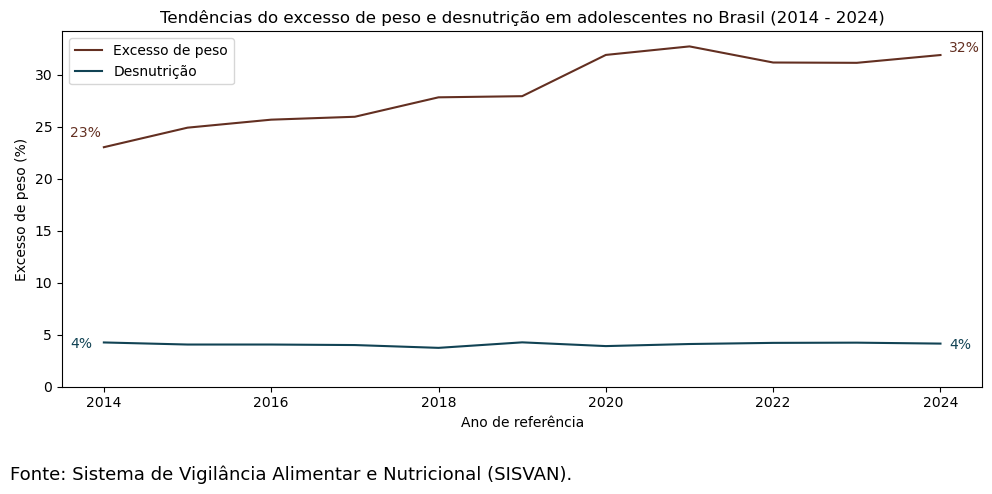

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df_regioes['ano'], df_regioes['perc_total_obesidade'], label='Excesso de peso', color='#632F21')
plt.plot(df_regioes['ano'], df_regioes['perc_total_desnutricao'], label='Desnutrição', color='#114354')

plt.text(2014 - 0.4, df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_obesidade'].values[0] + 1,
         f"{df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_obesidade'].values[0]:.0f}%", 
         color='#632F21', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2024 + 0.1, df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_obesidade'].values[0] + 0.3,
         f"{df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_obesidade'].values[0]:.0f}%", 
         color='#632F21', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2014 - 0.4, df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_desnutricao'].values[0] - 0.5,
         f"{df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_desnutricao'].values[0]:.0f}%", 
         color='#114354', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2024 + 0.1, df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_desnutricao'].values[0] - 0.5,
         f"{df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_desnutricao'].values[0]:.0f}%", 
         color='#114354', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.title('Tendências do excesso de peso e desnutrição em adolescentes no Brasil (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend()
plt.ylim(bottom=0)
plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=13)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
